<a href="https://colab.research.google.com/github/wndnjs2037/2020_systemprogramming/blob/master/3.Building_Height/%EA%B0%95%EC%84%9C%EA%B5%AC_%EA%B1%B4%EB%AC%BC_%EB%86%92%EC%9D%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 강서구의 건축물 높이 확인해서 지도에 낮은 건물 표시 (5층 이하의 건물만 집계)

# 분석 방식 -> folium이나 heatmap

# 비교 방법 
# 1. 강서구만 분석하는 경우 5층 이하의 건물이 많은 곳을 알아낼 수 있음
# 2. 강서구와 비슷한 조건의 구(서초, 강남 등)와 두개의 히트맵으로 비교하는 방법
# 3. 서울시 전체 구와 강서구 비교

# ? -> 주거용 건물의 전체 개수 필요한가? 낮은 건물의 비율로 따지려면 필요할 것 같음
# ? -> 타 구와의 비교가 필요한가? 강서구에 건물이 낮은걸 강조하기 위해서는 필요함. 근데 내용 설명 상 필요한지 잘 모르겠음

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

plt.rcParams['figure.figsize'] = [10, 8]

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/강서구 공공데이터/Data/건물 면적/강서구 층수_용도별 주거용 건축물 통계(전처리)_2020.csv', encoding='utf-8') #데이터 불러오기
#df1 = df1.set_index('자치구')  #자치구를 인덱스로 설정
#df1 = df1.drop(['위도','경도','단독주택', '다중주택','다가구주택','아파트','연립주택','다세대주택','기숙사','기타공동주택'], axis = 1) #세부정보 열 삭제
df1 = df1.pivot('area', 'floor','total') #피벗테이블 생성
df1

floor,1,2,3,4,5
area,,,,,
가양동,32.0,20.0,22.0,15.0,22.0
개화동,302.0,80.0,2.0,NaN,NaN
공항동,345.0,525.0,257.0,239.0,301.0
과해동,20.0,NaN,NaN,NaN,NaN
내발산동,53.0,195.0,127.0,174.0,158.0
등촌동,96.0,372.0,204.0,220.0,206.0
마곡동,27.0,15.0,13.0,15.0,10.0
방화동,513.0,943.0,345.0,298.0,239.0
염창동,45.0,26.0,38.0,42.0,17.0


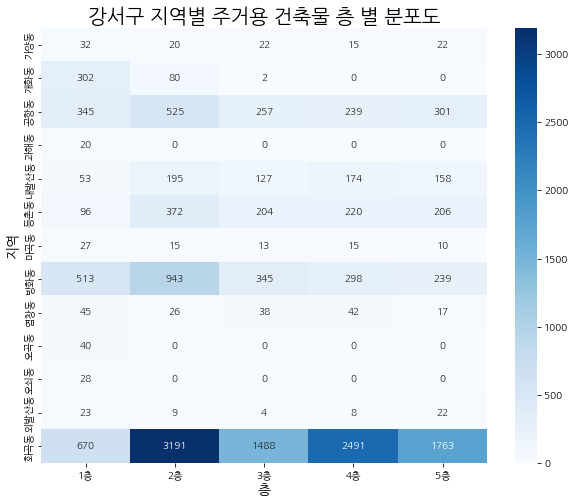

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/강서구 공공데이터/Data/건물 면적/강서구 층수_용도별 주거용 건축물 통계(찐)_2020.csv', encoding='utf-8') #데이터 불러오기
df2 = df2.pivot('area', 'floor','total') #피벗테이블 생성

sns.heatmap(df2, annot=True, fmt='.0f', cmap='Blues')
plt.xticks(np.arange(0.5, len(df2.columns), 1), df2.columns)
plt.yticks(np.arange(0.5, len(df2.index), 1), df2.index)
plt.title('강서구 지역별 주거용 건축물 층 별 분포도', fontsize=20)
plt.xlabel('층', fontsize=14)
plt.ylabel('지역', fontsize=14)

plt.show() 

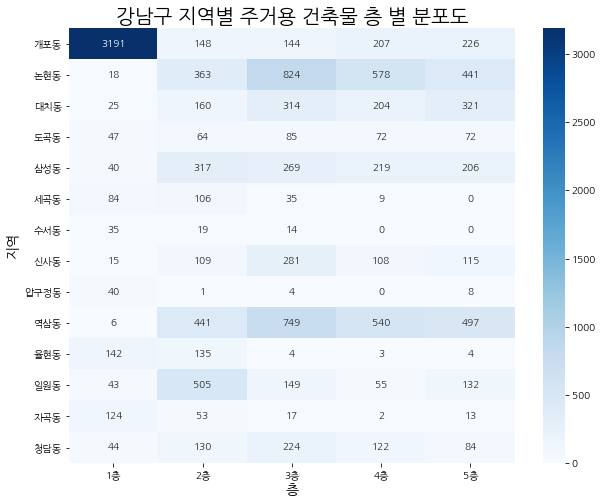

In [7]:
df2 = pd.read_csv('/content/drive/MyDrive/강서구 공공데이터/Data/건물 면적/강남구 층수_용도별 주거용 건축물 통계(가라)_2020.csv', encoding='utf-8') #데이터 불러오기
df2 = df2.pivot('area', 'floor','total') #피벗테이블 생성

sns.heatmap(df2, annot=True, fmt='.0f', cmap='Blues')
plt.xticks(np.arange(0.5, len(df2.columns), 1), df2.columns)
plt.yticks(np.arange(0.5, len(df2.index), 1), df2.index)
plt.title('강남구 지역별 주거용 건축물 층 별 분포도', fontsize=20)
plt.xlabel('층', fontsize=14)
plt.ylabel('지역', fontsize=14)

plt.show() 

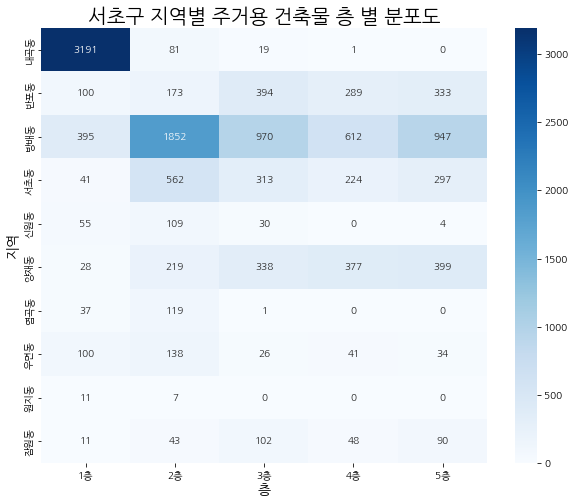

In [8]:
df3 = pd.read_csv('/content/drive/MyDrive/강서구 공공데이터/Data/건물 면적/서초구 층수_용도별 주거용 건축물 통계(가라)_2020.csv', encoding='utf-8') #데이터 불러오기
df3 = df3.pivot('area', 'floor','total') #피벗테이블 생성

sns.heatmap(df3, annot=True, fmt='.0f', cmap='Blues')
plt.xticks(np.arange(0.5, len(df3.columns), 1), df3.columns)
plt.yticks(np.arange(0.5, len(df3.index), 1), df3.index)
plt.title('서초구 지역별 주거용 건축물 층 별 분포도', fontsize=20)
plt.xlabel('층', fontsize=14)
plt.ylabel('지역', fontsize=14)

plt.show() 

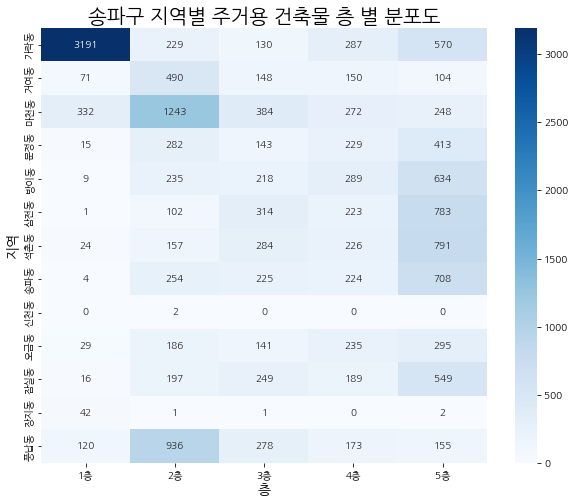

In [9]:
df4 = pd.read_csv('/content/drive/MyDrive/강서구 공공데이터/Data/건물 면적/송파구 층수_용도별 주거용 건축물 통계(가라)_2020.csv', encoding='utf-8') #데이터 불러오기
df4 = df4.pivot('area', 'floor','total') #피벗테이블 생성

sns.heatmap(df4, annot=True, fmt='.0f', cmap='Blues')
plt.xticks(np.arange(0.5, len(df4.columns), 1), df4.columns)
plt.yticks(np.arange(0.5, len(df4.index), 1), df4.index)
plt.title('송파구 지역별 주거용 건축물 층 별 분포도', fontsize=20)
plt.xlabel('층', fontsize=14)
plt.ylabel('지역', fontsize=14)

plt.show() 